# maysics.stats模块使用说明

stats模块有八个函数

|名称|作用|
|---|---|
|r_moment|原点矩|
|ex|数学期望|
|c_moment|中心矩|
|dx|方差|
|skew|偏度|
|kurt|峰度|
|mle|最大似然法|
|inde_test|独立性检验|

stats模块有两个类

|名称|作用|
|---|---|
|DF1d|一维分布拟合|
|DFT|单个分布拟合检验|

<br></br>
## 数字特征：r_moment、ex、c_moment、dx、skew、kurt
ex等价于一阶原点矩
<br>dx等价于二阶中心矩
<br>skew等价于三阶中心矩
<br>kurt等价于四阶中心矩

### DEMO 1-1：求在0,1上均匀分布的数据集数字特征

In [1]:
import maysics as ms
import numpy as np

np.random.seed(100)
data = np.random.rand(100)

print('一阶原点矩：{}'.format(ms.stats.r_moment(data)))
print('期望：{}'.format(ms.stats.ex(data)))

print('一阶中心矩：{}'.format(ms.stats.c_moment(data)))
print('二阶中心矩：{}'.format(ms.stats.c_moment(data, k=2)))
print('方差：{}'.format(ms.stats.dx(data)))
print('三阶中心矩：{}'.format(ms.stats.c_moment(data, k=3)))
print('偏度：{}'.format(ms.stats.skew(data)))
print('四阶中心矩：{}'.format(ms.stats.c_moment(data, k=4)))
print('峰度：{}'.format(ms.stats.kurt(data)))

一阶原点矩：0.4723667917192546
期望：0.4723667917192546
一阶中心矩：-4.662936703425657e-17
二阶中心矩：0.0836529978256185
方差：0.0836529978256185
三阶中心矩：0.005087259988591813
偏度：0.005087259988591813
四阶中心矩：0.013010821251786521
峰度：0.013010821251786521


### DEMO 1-2：求标准正态分布概率密度函数的数字特征

In [2]:
import maysics as ms
import numpy as np
from scipy.stats import norm

p_range = (-3, 3)
args = {'loc':0, 'scale':1}

print('一阶原点矩：{}'.format(ms.stats.r_moment(norm.pdf, p_range, args)))
print('期望：{}'.format(ms.stats.ex(norm.pdf, p_range, args)))

print('一阶中心矩：{}'.format(ms.stats.c_moment(norm.pdf, p_range, args)))
print('二阶中心矩：{}'.format(ms.stats.c_moment(norm.pdf, p_range, args, 2)))
print('方差：{}'.format(ms.stats.dx(norm.pdf, p_range, args)))
print('三阶中心矩：{}'.format(ms.stats.c_moment(norm.pdf, p_range, args, 3)))
print('偏度：{}'.format(ms.stats.skew(norm.pdf, p_range, args)))
print('四阶中心矩：{}'.format(ms.stats.c_moment(norm.pdf, p_range, args, 4)))
print('峰度：{}'.format(ms.stats.kurt(norm.pdf, p_range, args)))

一阶原点矩：-0.0013295545235813314
期望：-0.0013295545235813314
一阶中心矩：-3.6189585342657864e-06
二阶中心矩：0.9705522706732294
方差：0.9705522706732294
三阶中心矩：-0.008094781863626197
偏度：-0.008094781863626197
四阶中心矩：2.6717567286164305
峰度：2.6717567286164305


<br></br>
## 最大似然法：mle
用于概率密度函数的参数拟合
<br>构建似然函数：$L(\theta)=\ln(\Pi func(x_{i};\theta))=\Sigma \ln(func(x_{i};\theta))$
<br>其中$x_{i}$即数据集data中的元素
<br>求似然函数在$\theta \in$p_range取最大值时的$\theta$取值，即为最合适的参数值

<br>mle(func, data, p_range, acc=0.1)
<br>各参数意义如上式所示

### DEMO 2-1：拟合正态分布的均值和方差

In [3]:
import maysics as ms
import numpy as np
from scipy.stats import norm

np.random.seed(100)
data = np.random.normal(0, 0.5, (100,))

def f(x, param):
    return norm.pdf(x, loc=param[0], scale=param[1])

ms.stats.mle(f, data, [[-1, 1],[0.1, 1]])

array([-0.1,  0.5])

<br></br>
## 独立性检验：inde_test
用于检验两变量之间的独立性
<br>卡方值$=\Sigma \frac{(n_{i}-np_{i})^{2}}{np_{i}}$
<br>自由度$df=(R-1)(C-1)$
<br>其中$n_{i}$是联列表每一单位的数量，$p_{i}$是联列表每一单位的概率，$n$联列表的总数量
<br>$R$是联列表行数，$C$是联列表列数

<br>inde_test(data)
<br>'''data'''是二维数组，即联列表

<br>返回接受假设的错误概率，即认为两变量没有关系的错误概率

### DEMO 3-1：A、B两变量符合如下联列表，是否能在99.9%的把握下认为他们有关系？
||A情况1|A情况2|A情况3|
|---|---|---|---|
|B情况1|535|65|50|
|B情况2|282|18|50|

In [4]:
import maysics as ms

data = [[535, 65, 50],
        [382, 18, 50]]
ms.stats.inde_test(data)

0.9997138615953258

因为0.9997>0.999，所以拒绝原假设，可以认为他们有关系

<br></br>
## 一维分布拟合：DF1d
通过散点的频率分布拟合出概率密度函数
<br>用插值法得到具体函数表达式

DF1d(sample, span, kind='linear')
<br>```sample```是样本点
<br>```span```是区间间隔，如span = [a, b, c]则将区间分为[a, b]和[b, c]，并统计各区间频率
<br>```kind```：将插值类型指定为字符串('linear'、'nearest'、'zero'、'slinear'、'squardic'、'previous'、'next'，其中'zero'、'slinear'、'squared'和'cubic'表示零阶、一阶、二阶或三阶样条曲线插值；'previous'和'next'只返回点的上一个或下一个值)或作为一个整数指定要使用的样条曲线插值器的顺序。

<br>DF1d类含有两个方法：```show```、```savefig```
<br>分别用于显示和保存概率密度函数图像

### DEMO 4-1：拟合概率密度函数$f(x)$，并输出$f(0)$

In [5]:
from maysics.stats import DF1d
import numpy as np

np.random.seed(100)
data = np.random.normal(0, 1, 10000)

# -1.5至1.5，每0.1作为一个间隔，统计各个间隔的频率
span = np.arange(-1.5, 1.6, 0.1)
df1d = DF1d(data, span)
df1d.f(0)

array(0.0384)

### DEMO 4-2：拟合概率密度函数$f(x)$，并绘制函数图像

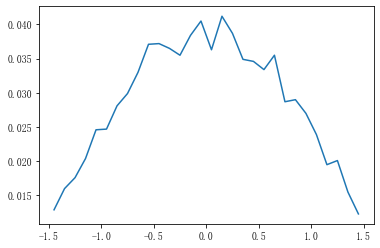

In [6]:
from maysics.stats import DF1d
import numpy as np

np.random.seed(100)
data = np.random.normal(0, 1, 10000)

# -1.5至1.5，每0.1作为一个间隔，统计各个间隔的频率
span = np.arange(-1.5, 1.6, 0.1)
df1d = DF1d(data, span)
df1d.show()

<br></br>
## 单个分布拟合检验：DFT
检验分布与数据的实际分布是否一致
DFT(func_type='pdf')
<br>```func_type```表示检验的函数类型，可选pdf(概率密度函数)、cdf(概率分布函数)、dis(离散分布)

<br>DFT类有三个方法：```fit```、```show```、```savefig```
<br>fit方法用于计算，show和savefig分别用于显示和保存图像
<br>DFT类有三个属性：```degree```、```chi2_value```、```P```
<br>degree表示卡方分布的自由度
<br>chi2_value表示卡方值
<br>P表示拒绝假设的错误概率

### fit方法：
fit(data, func, param={}, acc=0.1)
<br>```data```是待检验的数据集
<br>```func```是待检验的概率函数
<br>```param```用于传递func函数的其他参数
<br>```acc```仅用于```func_type='pdf'```和```func_type='cdf'```，表示积分的精度

### show和savefig方法：
两个方法绘制的图像有两个：
<br>1、原始数据的小提琴图，包括分布情况、四分位点、平均点
<br>2、func的函数图像
<br>需要注意的是，图像的纵坐标是经过缩放的，因此其数值没有具体意义
<br>两个都有一个默认参数：```acc=0.01```
<br>仅在func_type为'pdf'和'cdf'时有效，表示绘图精度

### DEMO 5-1：检验标准正态分布的概率密度函数并绘制图像

卡方分布的自由度：4
卡方值：3.0748689640328366
拒绝假设的错误概率：0.45462462387572755


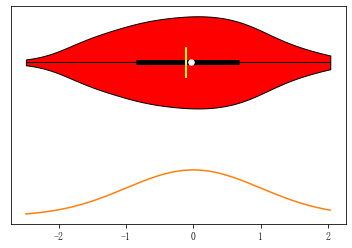

In [7]:
from maysics.stats import DFT
import numpy as np
from scipy.stats import norm

np.random.seed(100)
data = np.random.normal(0, 1, (100,))

# 分布拟合
dft = DFT()
dft.fit(data, norm.pdf, param={'loc':0, 'scale':1})

print('卡方分布的自由度：{}\n卡方值：{}\n拒绝假设的错误概率：{}'.format(dft.degree, dft.chi2_value, dft.P))

# 绘图
dft.show()

### DEMO 5-2：检验标准正态分布的概率分布函数并绘制图像

卡方分布的自由度：4
卡方值：3.309860425785515
拒绝假设的错误概率：0.4926285211114489


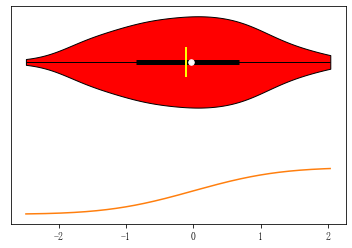

In [8]:
from maysics.stats import DFT
import numpy as np
from scipy.stats import norm

np.random.seed(100)
data = np.random.normal(0, 1, (100,))

# 分布拟合
dft = DFT('cdf')
dft.fit(data, norm.cdf, param={'loc':0, 'scale':1})

print('卡方分布的自由度：{}\n卡方值：{}\n拒绝假设的错误概率：{}'.format(dft.degree, dft.chi2_value, dft.P))

# 绘图
dft.show()

### DEMO 5-3：检验泊松分布并绘制图像

卡方分布的自由度：4
卡方值：3.1515964308001543
拒绝假设的错误概率：0.467215761589896


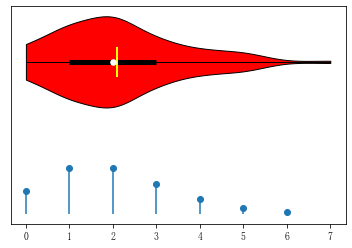

In [9]:
from maysics.stats import DFT
import numpy as np
from scipy.special import factorial
from scipy.stats import poisson

np.random.seed(100)
data = np.random.poisson(lam=2, size=100)

# 分布拟合
dft = DFT('pmf')
dft.fit(data, poisson.pmf, param={'mu':2})

print('卡方分布的自由度：{}\n卡方值：{}\n拒绝假设的错误概率：{}'.format(dft.degree, dft.chi2_value, dft.P))

# 绘图
dft.show()